In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from main import clean_text

In [4]:
df = pd.read_csv('content_moderation.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

<Axes: >

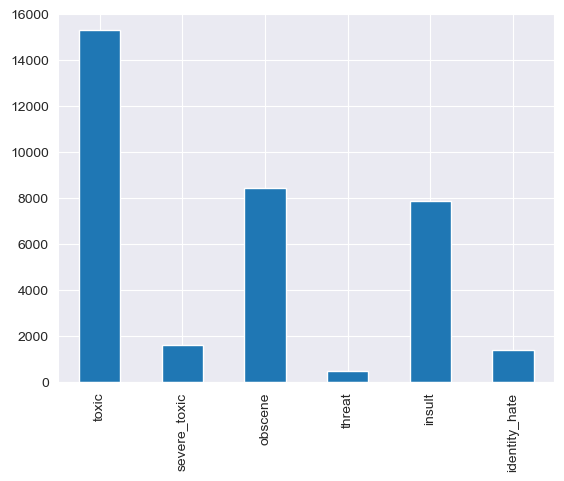

In [8]:
df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum().plot(kind='bar')

In [9]:
df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].mean() * 100

toxic            9.584448
severe_toxic     0.999555
obscene          5.294822
threat           0.299553
insult           4.936361
identity_hate    0.880486
dtype: float64

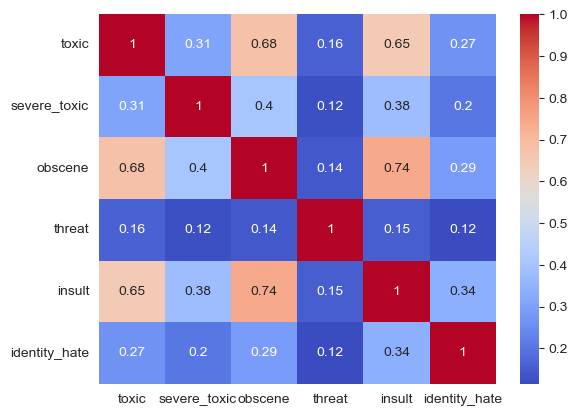

In [10]:
corr = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [11]:
df['clean_comment'] = df['comment_text'].apply(clean_text)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_comment
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww match background colour im seemingly stuc...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really trying edit war guy constant...
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0,cant make real suggestion improvement wondered...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page thats


In [12]:
vectorizer = TfidfVectorizer()

In [13]:
X = vectorizer.fit_transform(df['clean_comment'])
y = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
logreg = LogisticRegression()
logreg_model = MultiOutputClassifier(logreg)
logreg_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression())

In [16]:
y_pred = logreg_model.predict(X_test)
for i, label in enumerate(y.columns):
    accuracy = accuracy_score(y_test[label], y_pred[:, i])
    precision = precision_score(y_test[label], y_pred[:, i])
    recall = recall_score(y_test[label], y_pred[:, i])
    f1 = f1_score(y_test[label], y_pred[:, i])
    print(f'Accuracy for the label: {label}: {accuracy:.4f}')
    print(f'Precision for the label: {label}: {precision:.4f}')
    print(f'Recall for the label: {label}: {recall:.4f}')
    print(f'F1 score for the label: {label}: {f1:.4f}')

Accuracy for the label: toxic: 0.9550
Precision for the label: toxic: 0.9180
Recall for the label: toxic: 0.5825
F1 score for the label: toxic: 0.7127
Accuracy for the label: severe_toxic: 0.9908
Precision for the label: severe_toxic: 0.6047
Recall for the label: severe_toxic: 0.2430
F1 score for the label: severe_toxic: 0.3467
Accuracy for the label: obscene: 0.9752
Precision for the label: obscene: 0.9146
Recall for the label: obscene: 0.5930
F1 score for the label: obscene: 0.7195
Accuracy for the label: threat: 0.9977
Precision for the label: threat: 0.5000
Recall for the label: threat: 0.0946
F1 score for the label: threat: 0.1591
Accuracy for the label: insult: 0.9686
Precision for the label: insult: 0.8189
Recall for the label: insult: 0.4876
F1 score for the label: insult: 0.6113
Accuracy for the label: identity_hate: 0.9917
Precision for the label: identity_hate: 0.7736
Recall for the label: identity_hate: 0.1395
F1 score for the label: identity_hate: 0.2363


In [17]:
svm = SVC(kernel='linear')
svm_model = MultiOutputClassifier(svm)
svm_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=SVC(kernel='linear'))

In [18]:
y_pred = svm_model.predict(X_test)
for i, label in enumerate(y.columns):
    accuracy = accuracy_score(y_test[label], y_pred[:, i])
    precision = precision_score(y_test[label], y_pred[:, i])
    recall = recall_score(y_test[label], y_pred[:, i])
    f1 = f1_score(y_test[label], y_pred[:, i])
    print(f'Accuracy for the label: {label}: {accuracy:.4f}')
    print(f'Precision for the label: {label}: {precision:.4f}')
    print(f'Recall for the label: {label}: {recall:.4f}')
    print(f'F1 score for the label: {label}: {f1:.4f}')

Accuracy for the label: toxic: 0.9606
Precision for the label: toxic: 0.8943
Recall for the label: toxic: 0.6669
F1 score for the label: toxic: 0.7640
Accuracy for the label: severe_toxic: 0.9903
Precision for the label: severe_toxic: 0.5733
Recall for the label: severe_toxic: 0.1340
F1 score for the label: severe_toxic: 0.2172
Accuracy for the label: obscene: 0.9789
Precision for the label: obscene: 0.8978
Recall for the label: obscene: 0.6863
F1 score for the label: obscene: 0.7779
Accuracy for the label: threat: 0.9977
Precision for the label: threat: 0.5714
Recall for the label: threat: 0.1081
F1 score for the label: threat: 0.1818
Accuracy for the label: insult: 0.9711
Precision for the label: insult: 0.8064
Recall for the label: insult: 0.5651
F1 score for the label: insult: 0.6645
Accuracy for the label: identity_hate: 0.9918
Precision for the label: identity_hate: 0.7619
Recall for the label: identity_hate: 0.1633
F1 score for the label: identity_hate: 0.2689


In [19]:
joblib.dump(svm_model, 'moderation_model.pkl')

['moderation_model.pkl']

In [20]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']